In [1]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Parameters
num_records = 10000
start_date = datetime(2020, 1, 1)
end_date = datetime(2023, 1, 1)
num_policies = 500  # Number of unique policies

# Generate Policy IDs
policy_ids = [f'POL{str(i).zfill(6)}' for i in range(1, num_policies + 1)]

# Helper function to generate random dates
def random_date(start, end):
    return start + timedelta(days=random.randint(0, (end - start).days))

# Create dataset
data = {
    'Date': [random_date(start_date, end_date) for _ in range(num_records)],
    'Policy_ID': [random.choice(policy_ids) for _ in range(num_records)],
    'Premium_Amount': np.random.normal(500, 150, num_records).round(2),
    'Claim_Amount': np.random.exponential(200, num_records).round(2),
    'Number_of_Claims': np.random.poisson(1, num_records),
    'Policy_Type': np.random.choice(['Health', 'Auto', 'Life'], num_records),
    'Policy_Status': np.random.choice(['Active', 'Expired', 'Cancelled'], num_records),
    'Customer_Age': np.random.randint(18, 75, num_records),
    'Customer_Gender': np.random.choice(['Male', 'Female'], num_records),
    'Renewal_Probability': np.random.rand(num_records).round(2),
    'Risk_Score': np.random.randint(0, 101, num_records),
    'Customer_Loyalty_Score': np.random.randint(0, 101, num_records)
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Sort by Date and reset index
df = df.sort_values('Date').reset_index(drop=True)
print(df.head())


        Date  Policy_ID  Premium_Amount  Claim_Amount  Number_of_Claims  \
0 2020-01-01  POL000353          358.29        271.21                 2   
1 2020-01-01  POL000416          243.78         14.70                 2   
2 2020-01-01  POL000200          301.74         70.46                 0   
3 2020-01-01  POL000109          491.45        424.61                 1   
4 2020-01-01  POL000327          429.26        420.43                 0   

  Policy_Type Policy_Status  Customer_Age Customer_Gender  \
0      Health       Expired            19            Male   
1        Auto       Expired            33          Female   
2        Life     Cancelled            68            Male   
3        Auto     Cancelled            57            Male   
4        Auto     Cancelled            43          Female   

   Renewal_Probability  Risk_Score  Customer_Loyalty_Score  
0                 0.14           9                      69  
1                 0.93          54                      85  

Step 1: Import Libraries and Load Data
If you've created the data as shown earlier, let's proceed with processing and EDA.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `df` is our DataFrame with the synthetic data
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract year and month for trend analysis
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month


Step 2: Descriptive EDA
1. Data Overview and Basic Stats

In [3]:
# Display first few rows
print(df.head())

# Summary statistics for numerical columns
print(df.describe())

# Summary statistics for categorical columns
print(df.describe(include='object'))

# Check for missing values
print(df.isnull().sum())


        Date  Policy_ID  Premium_Amount  Claim_Amount  Number_of_Claims  \
0 2020-01-01  POL000353          358.29        271.21                 2   
1 2020-01-01  POL000416          243.78         14.70                 2   
2 2020-01-01  POL000200          301.74         70.46                 0   
3 2020-01-01  POL000109          491.45        424.61                 1   
4 2020-01-01  POL000327          429.26        420.43                 0   

  Policy_Type Policy_Status  Customer_Age Customer_Gender  \
0      Health       Expired            19            Male   
1        Auto       Expired            33          Female   
2        Life     Cancelled            68            Male   
3        Auto     Cancelled            57            Male   
4        Auto     Cancelled            43          Female   

   Renewal_Probability  Risk_Score  Customer_Loyalty_Score  Year  Month  
0                 0.14           9                      69  2020      1  
1                 0.93          54

In [4]:
# Unique policy types and status counts
print(df['Policy_Type'].value_counts())
print(df['Policy_Status'].value_counts())
print(df['Customer_Gender'].value_counts())


Policy_Type
Life      3384
Health    3318
Auto      3298
Name: count, dtype: int64
Policy_Status
Expired      3382
Cancelled    3321
Active       3297
Name: count, dtype: int64
Customer_Gender
Male      5043
Female    4957
Name: count, dtype: int64


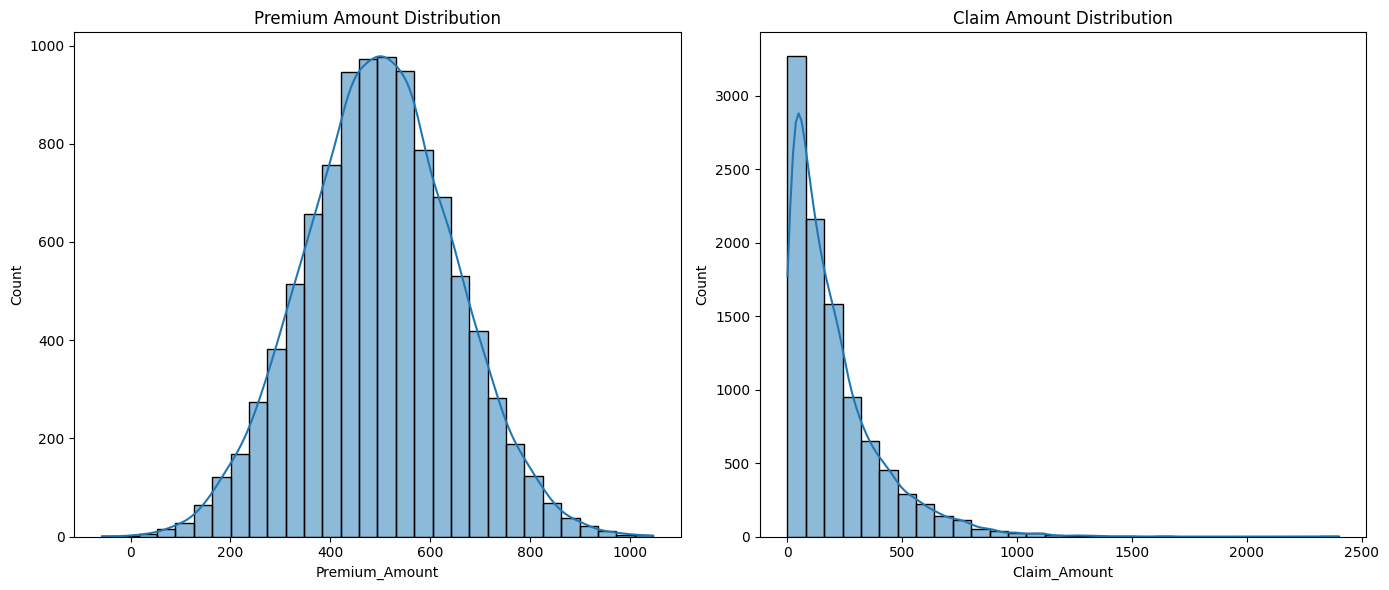

In [5]:
plt.figure(figsize=(14, 6))

# Premium Amount Distribution
plt.subplot(1, 2, 1)
sns.histplot(df['Premium_Amount'], bins=30, kde=True)
plt.title('Premium Amount Distribution')

# Claim Amount Distribution
plt.subplot(1, 2, 2)
sns.histplot(df['Claim_Amount'], bins=30, kde=True)
plt.title('Claim Amount Distribution')

plt.tight_layout()
plt.show()


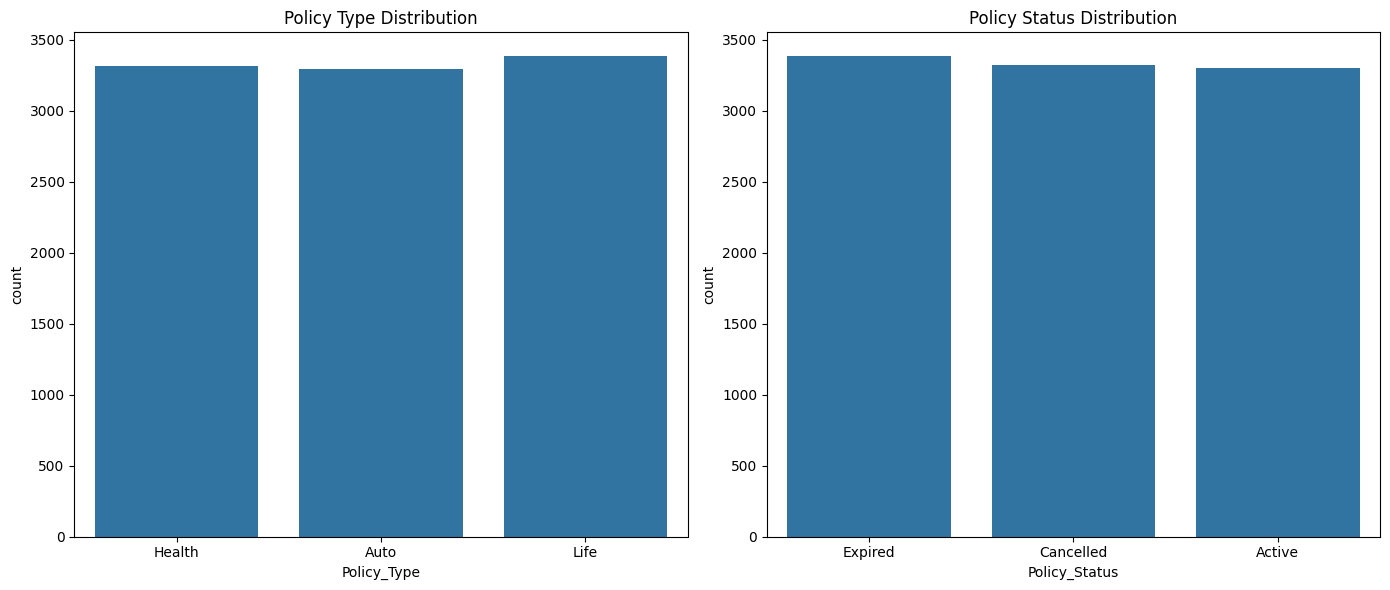

In [6]:
plt.figure(figsize=(14, 6))

# Policy Type Count
plt.subplot(1, 2, 1)
sns.countplot(x='Policy_Type', data=df)
plt.title('Policy Type Distribution')

# Policy Status Count
plt.subplot(1, 2, 2)
sns.countplot(x='Policy_Status', data=df)
plt.title('Policy Status Distribution')

plt.tight_layout()
plt.show()


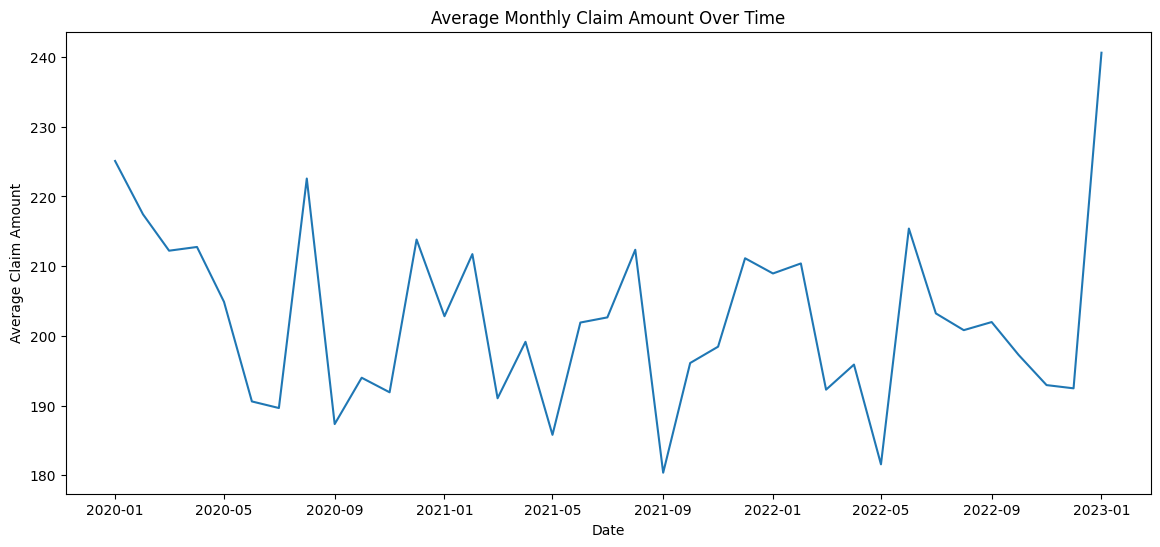

In [7]:
# Group by Year and Month to calculate average claims
monthly_claims = df.groupby(['Year', 'Month'])['Claim_Amount'].mean().reset_index()
monthly_claims['Date'] = pd.to_datetime(monthly_claims[['Year', 'Month']].assign(Day=1))

plt.figure(figsize=(14, 6))
sns.lineplot(x='Date', y='Claim_Amount', data=monthly_claims)
plt.title('Average Monthly Claim Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Average Claim Amount')
plt.show()


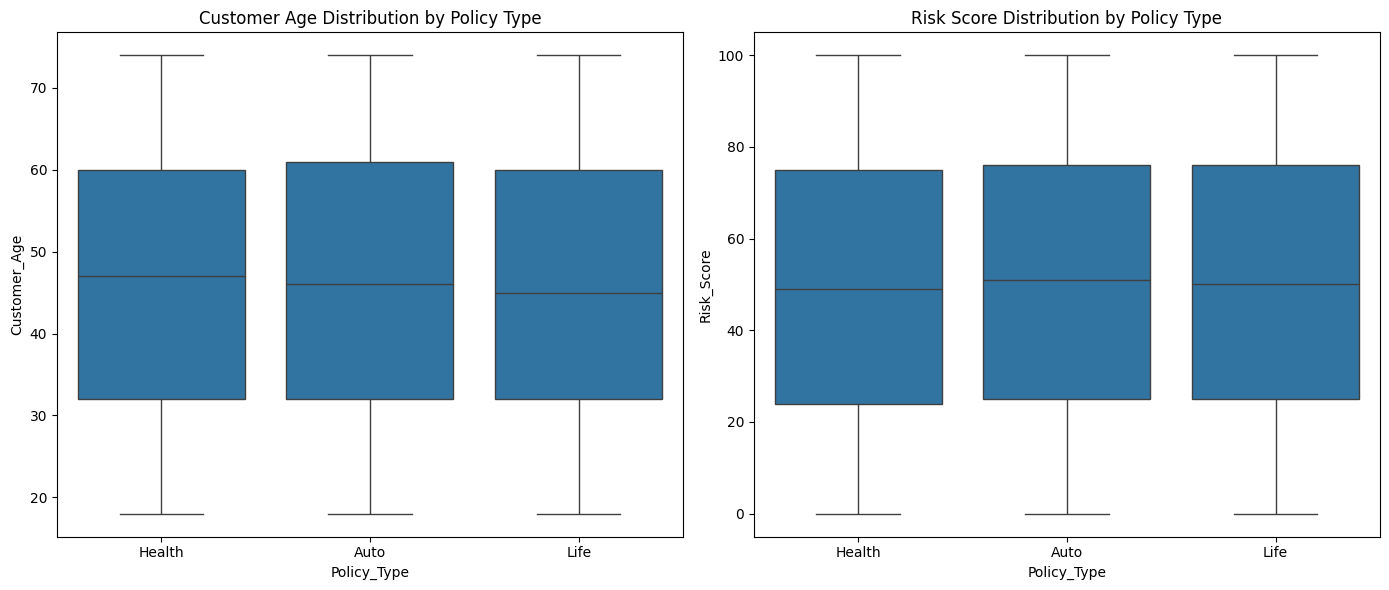

In [8]:
plt.figure(figsize=(14, 6))

# Customer Age by Policy Type
plt.subplot(1, 2, 1)
sns.boxplot(x='Policy_Type', y='Customer_Age', data=df)
plt.title('Customer Age Distribution by Policy Type')

# Risk Score by Policy Type
plt.subplot(1, 2, 2)
sns.boxplot(x='Policy_Type', y='Risk_Score', data=df)
plt.title('Risk Score Distribution by Policy Type')

plt.tight_layout()
plt.show()


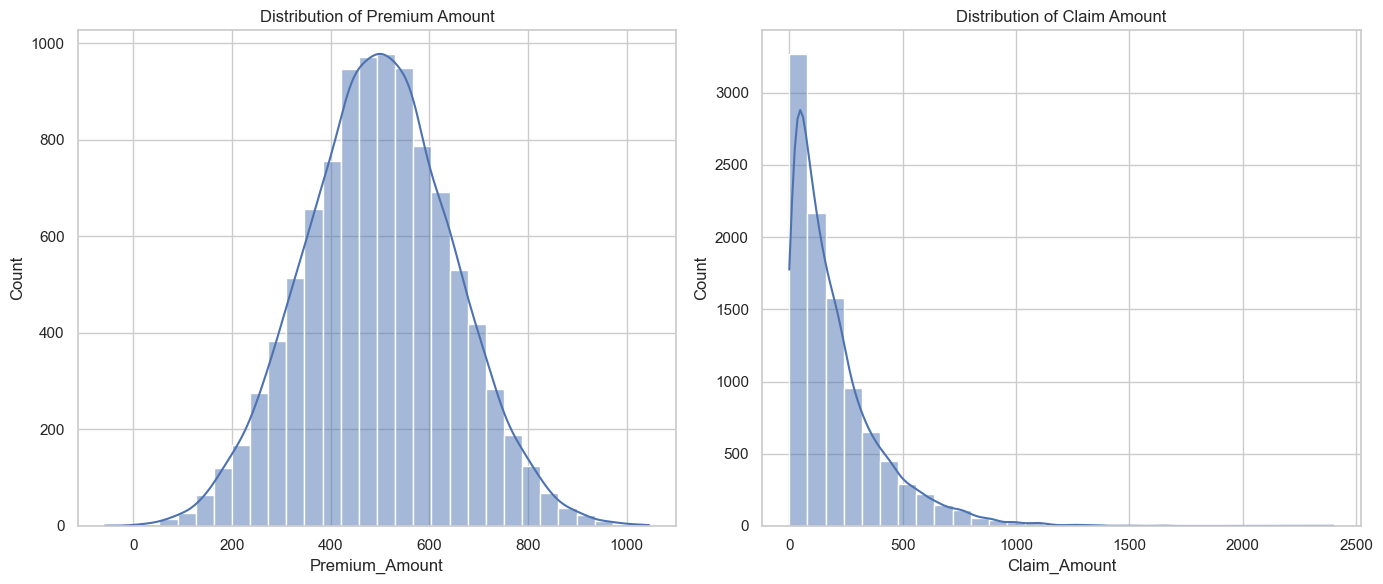

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style='whitegrid')

# Plot distribution of Premium Amount and Claim Amount
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Premium_Amount'], bins=30, kde=True)
plt.title('Distribution of Premium Amount')

plt.subplot(1, 2, 2)
sns.histplot(df['Claim_Amount'], bins=30, kde=True)
plt.title('Distribution of Claim Amount')

plt.tight_layout()
plt.show()


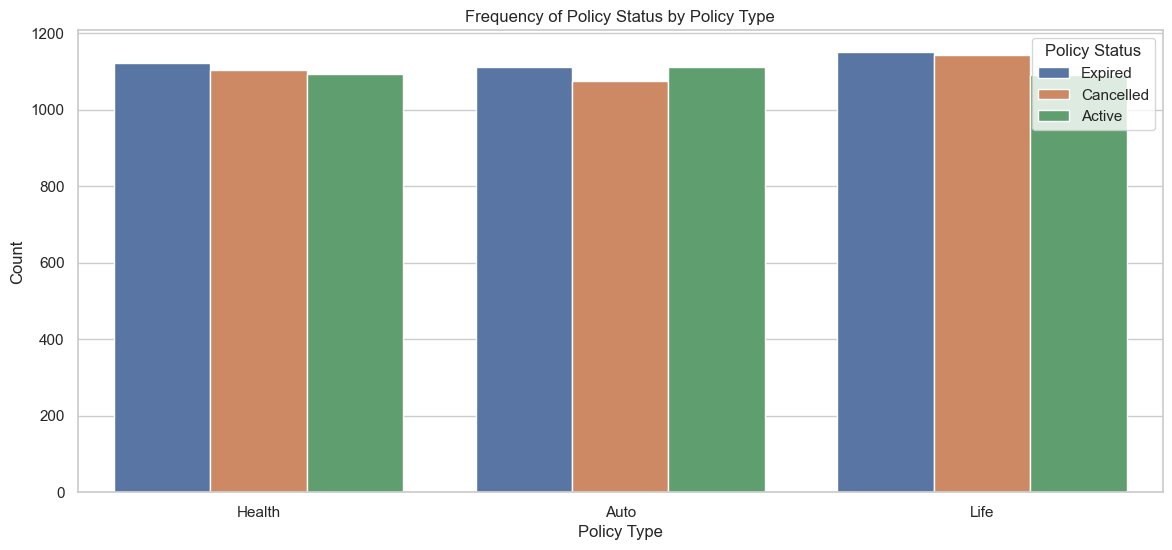

In [11]:
plt.figure(figsize=(14, 6))

# Frequency of claims by Policy Type
sns.countplot(x='Policy_Type', hue='Policy_Status', data=df)
plt.title('Frequency of Policy Status by Policy Type')
plt.xlabel('Policy Type')
plt.ylabel('Count')
plt.legend(title='Policy Status')
plt.show()


C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_12404\3998872812.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month', data=df, palette='viridis')


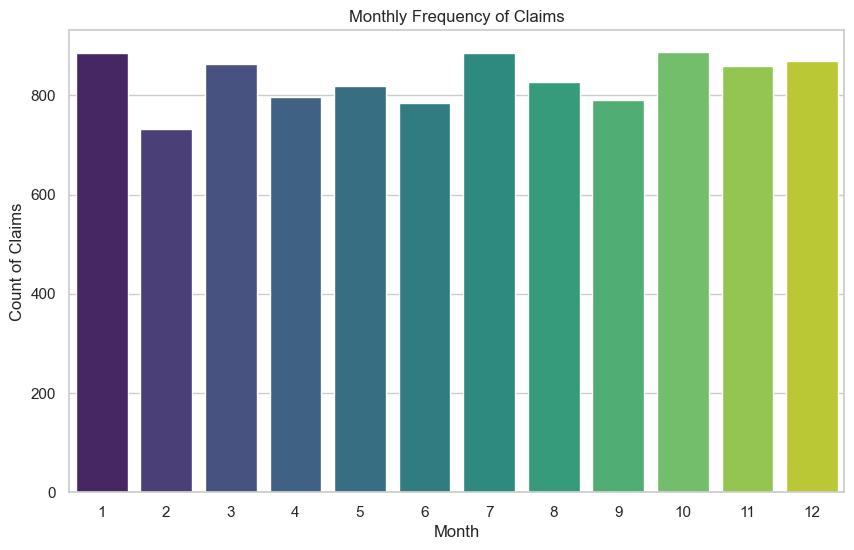

In [12]:
# Extract month for frequency analysis
df['Month'] = df['Date'].dt.month

plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=df, palette='viridis')
plt.title('Monthly Frequency of Claims')
plt.xlabel('Month')
plt.ylabel('Count of Claims')
plt.show()


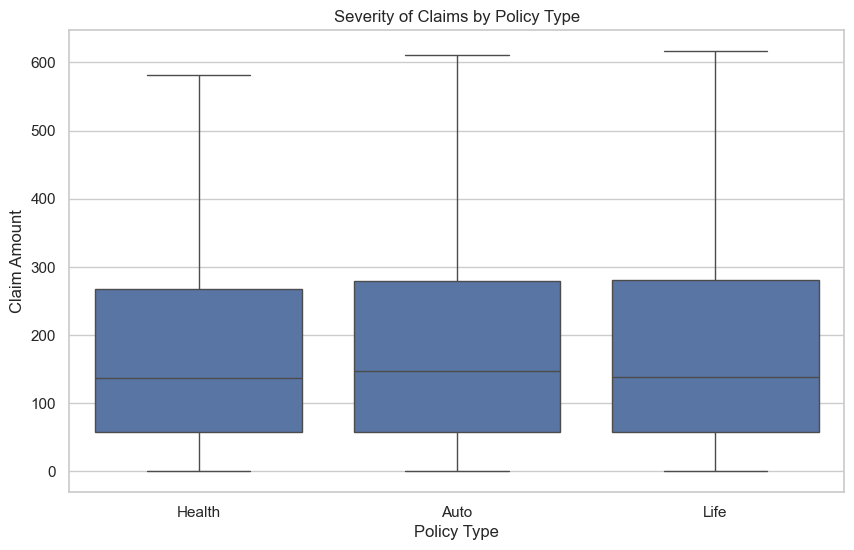

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Policy_Type', y='Claim_Amount', data=df, showfliers=False)
plt.title('Severity of Claims by Policy Type')
plt.xlabel('Policy Type')
plt.ylabel('Claim Amount')
plt.show()


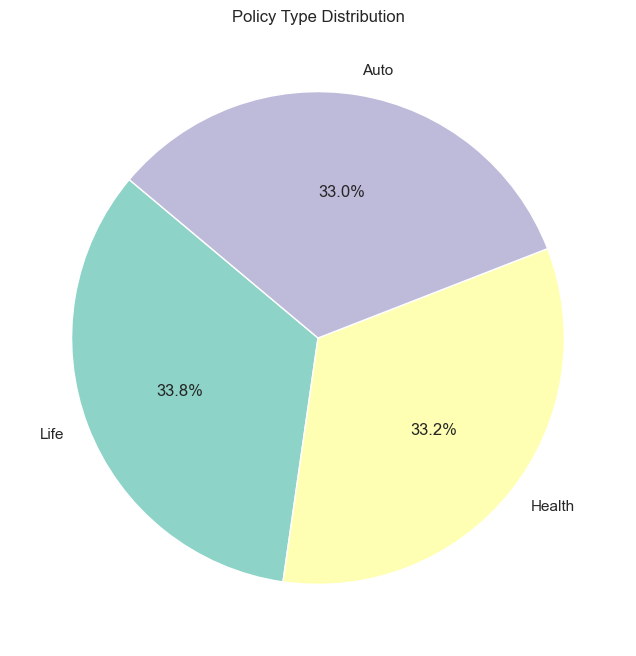

In [14]:
policy_type_counts = df['Policy_Type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(policy_type_counts, labels=policy_type_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3'))
plt.title('Policy Type Distribution')
plt.show()


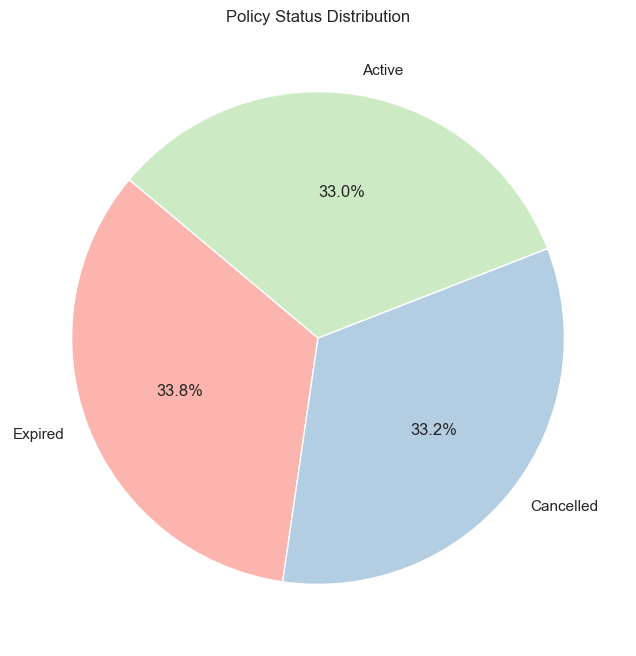

In [15]:
policy_status_counts = df['Policy_Status'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(policy_status_counts, labels=policy_status_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Pastel1'))
plt.title('Policy Status Distribution')
plt.show()


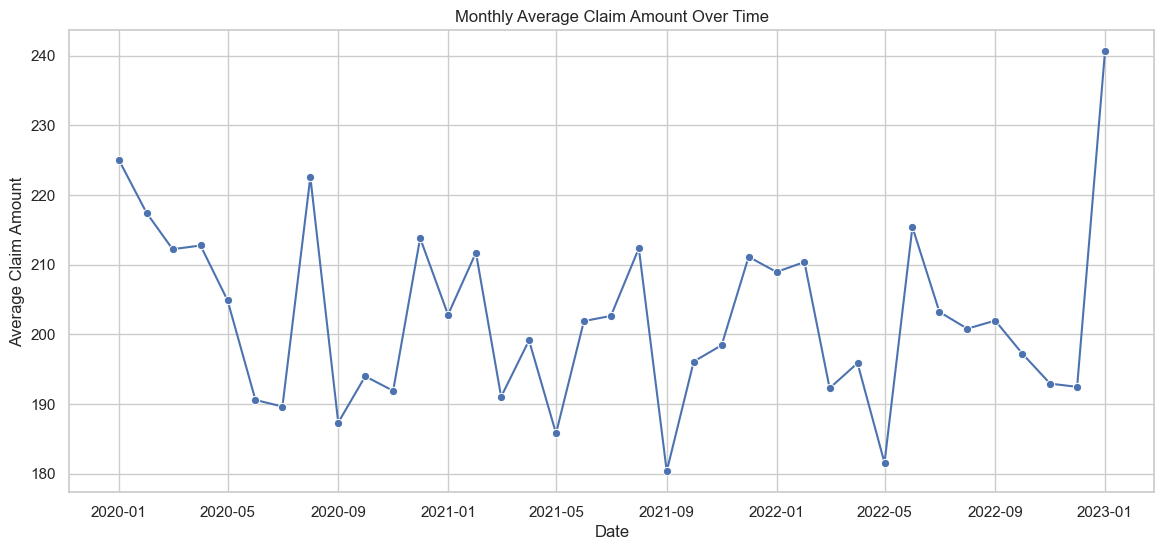

In [16]:
# Calculate monthly average claim amount
monthly_trend = df.groupby(['Year', 'Month'])['Claim_Amount'].mean().reset_index()
monthly_trend['Date'] = pd.to_datetime(monthly_trend[['Year', 'Month']].assign(Day=1))

plt.figure(figsize=(14, 6))
sns.lineplot(x='Date', y='Claim_Amount', data=monthly_trend, marker='o', color='b')
plt.title('Monthly Average Claim Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Average Claim Amount')
plt.show()


Step 6: Observations and Insights
Distribution Insights: Premium and claim amounts show expected distribution; extreme values indicate possible outliers.
Frequency Insights: Policies like "Auto" may see higher claim counts, suggesting potential risks.
Severity Insights: Policies with higher average claim amounts may benefit from additional analysis or re-evaluation.
Trend Insights: Monthly trends help identify high-risk periods and seasonality.
This EDA approach enables a better understanding of customer and policy behaviors, risk areas, and financial impact, guiding further insurance domain strategies.

In [23]:
#!pip install ipywidgets
#jupyter nbextension enable --py widgetsnbextension


SyntaxError: invalid syntax (4047574407.py, line 2)

In [24]:
#pythonCopy code
import pandas as pd
from ydata_profiling import ProfileReport

# Assuming `df` is your DataFrame
profile = ProfileReport(df, title="Insurance Data EDA Report", explorative=True)

# Display the report in Jupyter Notebook
profile.to_notebook_iframe()

# Save the report as an HTML file
profile.to_file("insurance_data_eda_report.html")

Render HTML: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.30s/it]


Export report to file: 100%|█████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 63.99it/s]


In [25]:
pip install sweetviz

   ---------------------------------------- 0.0/15.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.1 MB 1.9 MB/s eta 0:00:08
   ---------------------------------------- 0.2/15.1 MB 2.2 MB/s eta 0:00:07
    --------------------------------------- 0.3/15.1 MB 2.6 MB/s eta 0:00:06
    --------------------------------------- 0.4/15.1 MB 2.5 MB/s eta 0:00:06
   - -------------------------------------- 0.5/15.1 MB 2.8 MB/s eta 0:00:06
   - -------------------------------------- 0.6/15.1 MB 2.6 MB/s eta 0:00:06
   - -------------------------------------- 0.7/15.1 MB 2.5 MB/s eta 0:00:06
   -- ------------------------------------- 0.8/15.1 MB 2.5 MB/s eta 0:00:06
   -- ------------------------------------- 0.9/15.1 MB 2.5 MB/s eta 0:00:06
   -- ------------------------------------- 1.0/15.1 MB 2.5 MB/s eta 0:00:06
   -- ------------------------------------- 1.0/15.1 MB 2.5 MB/s eta 0:00:06
   -- ------------------------------------- 1.1/15.1 MB 2.5 MB/s eta 0:00:06
   ---


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
import sweetviz as sv

# Generate report
report = sv.analyze(df)
report.show_html("insurance_data_sweetviz_report.html")  # Save and open report as an HTML file


Done! Use 'show' commands to display/save.   |█████████████████████████████████████████| [100%]   00:00 -> (00:00 left)


Report insurance_data_sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [31]:
!pip install dataprep


  Using cached dataprep-0.4.1-py3-none-any.whl.metadata (14 kB)
  Using cached bokeh-2.4.3-py3-none-any.whl.metadata (14 kB)
  Using cached Bottleneck-1.4.2-cp312-cp312-win_amd64.whl.metadata (7.9 kB)
  Using cached dask-2.30.0-py3-none-any.whl.metadata (3.4 kB)
  Using cached Flask-1.1.4-py2.py3-none-any.whl.metadata (4.6 kB)
  Using cached Flask_Cors-3.0.10-py2.py3-none-any.whl.metadata (5.4 kB)
  Using cached ipywidgets-7.8.5-py2.py3-none-any.whl.metadata (1.9 kB)
  Using cached Jinja2-2.11.3-py2.py3-none-any.whl.metadata (3.5 kB)
  Using cached jsonpath_ng-1.7.0-py3-none-any.whl
  Using cached levenshtein-0.12.0.tar.gz (54 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached Metaphone-0.6-py3-none-any.whl
  Using cached pandas-1.5.3.tar.gz (5.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requiremen

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [28 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-312
  creating build\lib.win-amd64-cpython-312\Levenshtein
  copying Levenshtein\StringMatcher.py -> build\lib.win-amd64-cpython-312\Levenshtein
  copying Levenshtein\__init__.py -> build\lib.win-amd64-cpython-312\Levenshtein
  running egg_info
  writing levenshtein.egg-info\PKG-INFO
  writing dependency_links to levenshtein.egg-info\dependency_links.txt
  deleting levenshtein.egg-info\entry_points.txt
  writing namespace_packages to levenshtein.egg-info\namespace_packages.txt
  writing requirements to levenshtein.egg-info\requires.txt
  writing top-level names to levenshtein.egg-info\top_level.txt
  reading manifest file 'levenshtein.egg-info\SOURCES.txt'
  reading manifest template 'MANIFEST.in'
  adding license file 'COPYING'
  writing 

In [37]:
from dataprep.eda import create_report
import dataprep
from dataprep.datasets import load_dataset
from dataprep.eda import create_report
from dataprep.eda import plot, plot_correlation, plot_missing

# Generate an EDA report for the DataFrame
report = create_report(df)
report.show_html()  # This will display the report in your default web browser




ModuleNotFoundError: No module named 'dataprep'

In [38]:
import pandas as pd
from dataprep.eda import create_report
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
report = create_report(df)
report # show report in notebook
report.save('My Fantastic Report') # save report to local disk
report.show_browser() # show report in the browser

ModuleNotFoundError: No module named 'dataprep'